# Import Libraries

In [2]:
import pandas as pd
import numpy as np
import phik
import matplotlib.pyplot as plt
import seaborn as sns

import tensorflow as tf
import tensorflow.keras as keras
from tensorflow.keras import Sequential
from sklearn.model_selection import train_test_split
from sklearn.metrics import ConfusionMatrixDisplay, confusion_matrix, classification_report
from sklearn.preprocessing import LabelBinarizer, OrdinalEncoder, RobustScaler
from feature_engine.outliers import Winsorizer
from sklearn.compose import ColumnTransformer

# Data Loading

In [3]:
# Data Loading
database = pd.read_csv('hotel.csv')
database.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36275 entries, 0 to 36274
Data columns (total 19 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   Booking_ID                            36275 non-null  object 
 1   no_of_adults                          36275 non-null  int64  
 2   no_of_children                        36275 non-null  int64  
 3   no_of_weekend_nights                  36275 non-null  int64  
 4   no_of_week_nights                     36275 non-null  int64  
 5   type_of_meal_plan                     36275 non-null  object 
 6   required_car_parking_space            36275 non-null  int64  
 7   room_type_reserved                    36275 non-null  object 
 8   lead_time                             36275 non-null  int64  
 9   arrival_year                          36275 non-null  int64  
 10  arrival_month                         36275 non-null  int64  
 11  arrival_date   

In [4]:
database.head()

,Booking_ID,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,booking_status
0,ID00001,2,0,1,2,Meal Plan 1,0,Room_Type 1,224,2017,10,2,Offline,0,0,0,65.00,0,Not_Canceled
1,ID00002,2,0,2,3,Not Selected,0,Room_Type 1,5,2018,11,6,Online,0,0,0,106.68,1,Not_Canceled
2,ID00003,1,0,2,1,Meal Plan 1,0,Room_Type 1,1,2018,2,28,Online,0,0,0,60.00,0,Canceled
3,ID00004,2,0,0,2,Meal Plan 1,0,Room_Type 1,211,2018,5,20,Online,0,0,0,100.00,0,Canceled
4,ID00005,2,0,1,1,Not Selected,0,Room_Type 1,48,2018,4,11,Online,0,0,0,94.50,0,Canceled


In [5]:
database.tail()

,Booking_ID,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,booking_status
36270,ID36271,3,0,2,6,Meal Plan 1,0,Room_Type 4,85,2018,8,3,Online,0,0,0,167.80,1,Not_Canceled
36271,ID36272,2,0,1,3,Meal Plan 1,0,Room_Type 1,228,2018,10,17,Online,0,0,0,90.95,2,Canceled
36272,ID36273,2,0,2,6,Meal Plan 1,0,Room_Type 1,148,2018,7,1,Online,0,0,0,98.39,2,Not_Canceled
36273,ID36274,2,0,0,3,Not Selected,0,Room_Type 1,63,2018,4,21,Online,0,0,0,94.50,0,Canceled
36274,ID36275,2,0,1,2,Meal Plan 1,0,Room_Type 1,207,2018,12,30,Offline,0,0,0,161.67,0,Not_Canceled


# Exploration Data Analysis

### Melihat Korelasi Data

interval columns not set, guessing: ['no_of_adults', 'no_of_children', 'no_of_weekend_nights', 'no_of_week_nights', 'required_car_parking_space', 'lead_time', 'arrival_year', 'arrival_month', 'arrival_date', 'repeated_guest', 'no_of_previous_cancellations', 'no_of_previous_bookings_not_canceled', 'avg_price_per_room', 'no_of_special_requests']


c:\Users\Administrator\AppData\Local\Programs\Python\Python310\lib\site-packages\phik\data_quality.py:59: UserWarning: The number of unique values of variable Booking_ID is large: 36275. Are you sure this is not an interval variable? Analysis for pairs of variables including Booking_ID can be slow.
  warnings.warn(


interval columns not set, guessing: ['no_of_adults', 'no_of_children', 'no_of_weekend_nights', 'no_of_week_nights', 'required_car_parking_space', 'lead_time', 'arrival_year', 'arrival_month', 'arrival_date', 'repeated_guest', 'no_of_previous_cancellations', 'no_of_previous_bookings_not_canceled', 'avg_price_per_room', 'no_of_special_requests']


c:\Users\Administrator\AppData\Local\Programs\Python\Python310\lib\site-packages\phik\data_quality.py:59: UserWarning: The number of unique values of variable Booking_ID is large: 36275. Are you sure this is not an interval variable? Analysis for pairs of variables including Booking_ID can be slow.
  warnings.warn(


<Axes: >

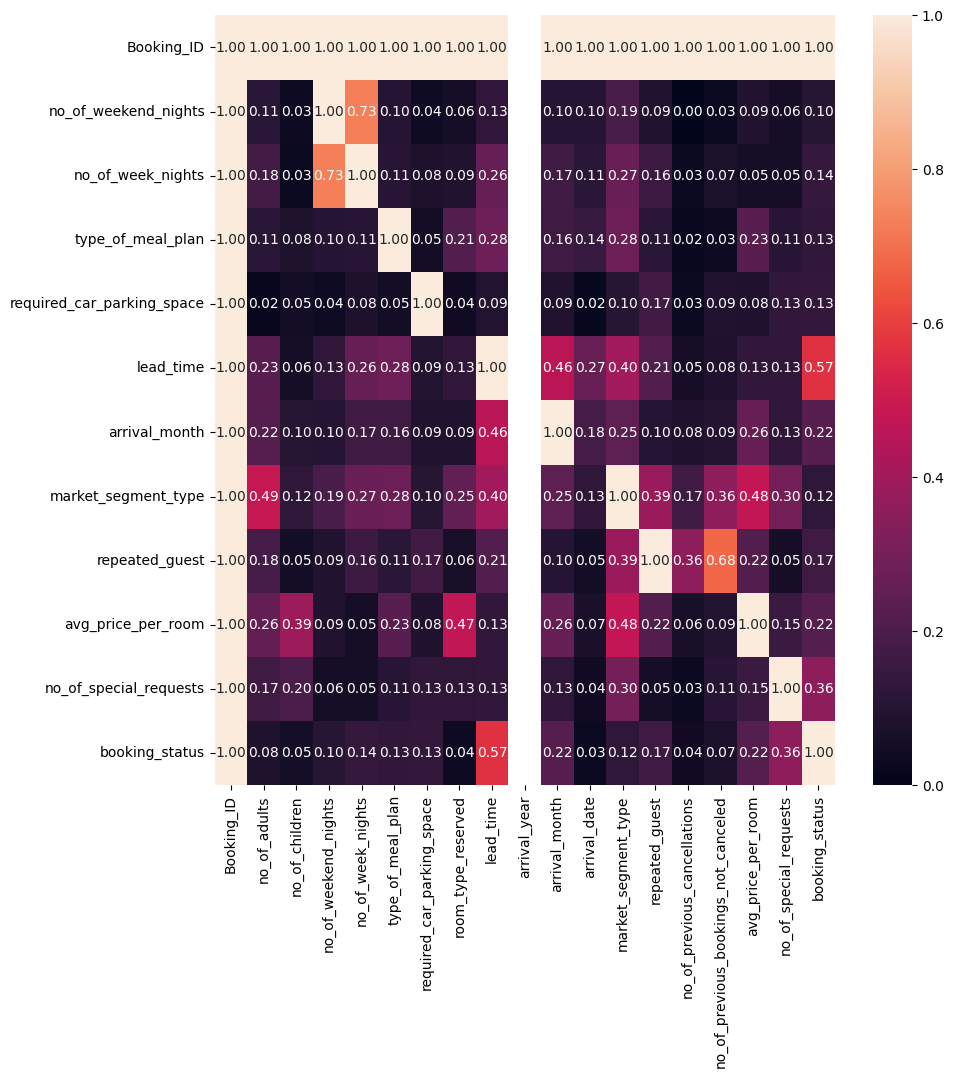

In [6]:
plt.figure(figsize=(10,10))
sns.heatmap(database.phik_matrix()[abs(database.phik_matrix()['booking_status'])>0.1 ],annot=True,fmt='.2f')

no_of_weekend_nights, no_of_week_nights, type_of_meal_plan, required_car_parking_space, lead_time, arrival_month, market_segment_type, repeated_guest, avg_price_per_room, no_of_special_requests adalah kolom yang memiliki korelasi yang tinggi.

In [7]:
feature = 'no_of_weekend_nights, no_of_week_nights, type_of_meal_plan, required_car_parking_space, lead_time, arrival_month, market_segment_type, repeated_guest, avg_price_per_room, no_of_special_requests'.replace(' ','').split(',')
feature

['no_of_weekend_nights',
 'no_of_week_nights',
 'type_of_meal_plan',
 'required_car_parking_space',
 'lead_time',
 'arrival_month',
 'market_segment_type',
 'repeated_guest',
 'avg_price_per_room',
 'no_of_special_requests']

### Melihat Informasi dari Feature

In [8]:
database[feature].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36275 entries, 0 to 36274
Data columns (total 10 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   no_of_weekend_nights        36275 non-null  int64  
 1   no_of_week_nights           36275 non-null  int64  
 2   type_of_meal_plan           36275 non-null  object 
 3   required_car_parking_space  36275 non-null  int64  
 4   lead_time                   36275 non-null  int64  
 5   arrival_month               36275 non-null  int64  
 6   market_segment_type         36275 non-null  object 
 7   repeated_guest              36275 non-null  int64  
 8   avg_price_per_room          36275 non-null  float64
 9   no_of_special_requests      36275 non-null  int64  
dtypes: float64(1), int64(7), object(2)
memory usage: 2.8+ MB


Kolom type of meal plan dan market segment type adalah data object

### Melihat Skewness kolom Numerik

In [9]:
database[feature].select_dtypes(include=np.number).skew()

no_of_weekend_nights          0.737616
no_of_week_nights             1.599350
required_car_parking_space    5.413643
lead_time                     1.292492
arrival_month                -0.348229
repeated_guest                6.002888
avg_price_per_room            0.667133
no_of_special_requests        1.145081
dtype: float64

Semua data skew maka akan dinormalisasi dengan Winsorizer iqr

### Melihat Kardinality kolom categorical

In [10]:
database[feature].select_dtypes(include=['object']).nunique()

type_of_meal_plan      4
market_segment_type    5
dtype: int64

Kolom categorical memiliki kardinaliti yang rendah, maka akan di encode menggunakan OrdinalEncoder

### Melihat Missing Value pada feature

In [11]:
database[feature].isnull().sum()

no_of_weekend_nights          0
no_of_week_nights             0
type_of_meal_plan             0
required_car_parking_space    0
lead_time                     0
arrival_month                 0
market_segment_type           0
repeated_guest                0
avg_price_per_room            0
no_of_special_requests        0
dtype: int64

Tidak ada data kosong, maka tidak perlu penanganan missing value

# Feature Engineering

### Data Splitting

In [60]:
### Data Splitting
X, y = database.drop(columns=[database.columns[-1]]), database[database.columns[-1]]

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=24,stratify=y)
X_train, X_val, y_train, y_val = train_test_split(X_train,y_train,test_size=0.2,random_state=24,stratify=y_train)
X_test.to_csv('inference.csv',index=False)

### Feature Selection

In [61]:
X_train, X_val = X_train[feature], X_val[feature]

### Outlier Handling

In [62]:
num_col = X_train.select_dtypes(include=np.number).columns.tolist()
cat_col = X_train.select_dtypes(include=['object']).columns.tolist()
outliers = [i for i in X_train[num_col].columns if X_train[i].nunique() > 50 ]

win = Winsorizer(capping_method='iqr',fold=3,tail='both',variables=outliers)

X_train[outliers] = win.fit_transform(X_train[outliers])
X_val[outliers] = win.transform(X_val[outliers])

Outlier telah ditangani

### Encoding Dan Scaling

Scaling akan menggunakan Robust Scaler karena cukup bagus bagi data yang skew sedangkan Encoding akan digunakan Ordinal Scaler karena variasi data categorical yang sedikit 

In [63]:
enc = ('enc',OrdinalEncoder(),cat_col)
scal = ('scal',RobustScaler(),num_col)

trans = ColumnTransformer([enc,scal],remainder='passthrough')

In [64]:
np.where(y_train == 'Canceled',1,0)

array([1, 0, 0, ..., 0, 0, 0])

In [65]:
X_train = trans.fit_transform(X_train)
X_val = trans.transform(X_val)

y_train = np.where(y_train == 'Canceled',1,0)
y_val = np.where(y_val == 'Canceled',1,0)

# Model Definition

In [66]:
#callback definition
# Callback Definition
callback = [
    [keras.callbacks.EarlyStopping(monitor='val_loss', patience= 3),
    keras.callbacks.ModelCheckpoint('seq_model.hdf5', monitor='val_loss', save_best_only=True)
    #ReduceLRonPlateau
     ],
    [keras.callbacks.EarlyStopping(monitor='val_loss', patience= 3),
    keras.callbacks.ModelCheckpoint('func_model.hdf5', monitor='val_loss', save_best_only=True)
    #ReduceLRonPlateau
     ]
]

In [67]:
def seq(input_shape):
    keras.backend.clear_session()
    keras.utils.set_random_seed(10)
    
    model = Sequential()
    # Input Layer
    model.add(keras.layers.Dense(16,input_shape=input_shape,activation='relu'))
    # Hidden Layer
    for i in range(5,10):
        if i > 8:
            model.add(keras.layers.Dense(2**(i+(5-i)),activation='relu'))
        else:
            model.add(keras.layers.Dense(2**(i),activation='relu'))
    # Output Layer
    model.add(keras.layers.Flatten())
    model.add(keras.layers.Dense(128,activation='relu'))
    model.add(keras.layers.Dense(1,activation='sigmoid'))
    
    # Complie and Optimize
    model.compile(optimizer='adam',loss='binary_crossentropy',metrics=keras.metrics.Precision(),run_eagerly=True)
    model.summary()
    return model

def func(input_shape):
    keras.backend.clear_session()
    keras.utils.set_random_seed(10)
    
    #Input Layer
    input_shapes1 = keras.layers.Input(input_shape)
    x = keras.layers.Dense(2**4,activation='relu')(input_shapes1)
    y = keras.layers.Dense(2**4,activation='relu')(input_shapes1)
    
    #Hidden Layer
    for i in range(5,7):
        try:
            concat = keras.layers.concatenate([x,y])
            input_shapes = keras.layers.Dense(2**(i+1),activation='relu')(concat)
            
            x = keras.layers.Dense(2**i,activation='relu')(input_shapes)
            y = keras.layers.Dense(2**i,activation='relu')(input_shapes)
            
        except Exception as e:
            print(i)
            print(e)
    
    concat = keras.layers.concatenate([x,y])
    input_shapes = keras.layers.Dense(2**(7+1),activation='relu')(concat)
    
    # Output Layer
    merged = keras.layers.Flatten()(input_shapes)
    merged = keras.layers.Dense(128,activation='relu')(merged)
    output_layer = keras.layers.Dense(1,activation='sigmoid')(merged)
    
    
    model = keras.Model(input_shapes1,output_layer)
    
    # Complie and Optimize
    model.compile(optimizer='adam',loss='binary_crossentropy',metrics=keras.metrics.Precision(),run_eagerly=True)
    model.summary()
    return model

### Sequential Model

In [68]:
X_train.shape[1:]

(10,)

In [69]:
seq_model = seq(X_train.shape[1:])

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 16)                176       
                                                                 
 dense_1 (Dense)             (None, 32)                544       
                                                                 
 dense_2 (Dense)             (None, 64)                2112      
                                                                 
 dense_3 (Dense)             (None, 128)               8320      
                                                                 
 dense_4 (Dense)             (None, 256)               33024     
                                                                 
 dense_5 (Dense)             (None, 32)                8224      
                                                                 
 flatten (Flatten)           (None, 32)                0

Model dibuat dengan mengkonversikan input layer menjadi 16 neural net dan hidden layer yang meneruskan data ke neural net yang 

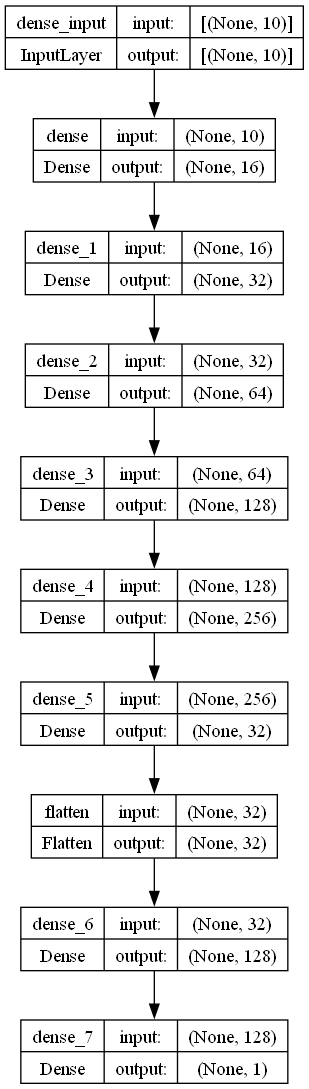

In [70]:
keras.utils.plot_model(seq_model,show_shapes=True)

Input layer memiliki filter sebanyak 10 dan diteruskan ke hidden layer dengan activation function relu yang memiliki filter/Jaring Neural kelipatan 2 (16,32,64,128,256), setelahnya model di ratakan menjadi 1 Dimensi dan lalu di teruskan ke 1 layer yang memiliki filter 128, setelahnya dihasilkan hasil kesimpulan data dengan menggunakan aktivasi fungsi sigmoid. 

### Functional Model

In [71]:
func_model = func(X_train.shape[1:])

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_1 (InputLayer)        [(None, 10)]                 0         []                            
                                                                                                  
 dense (Dense)               (None, 16)                   176       ['input_1[0][0]']             
                                                                                                  
 dense_1 (Dense)             (None, 16)                   176       ['input_1[0][0]']             
                                                                                                  
 concatenate (Concatenate)   (None, 32)                   0         ['dense[0][0]',               
                                                                     'dense_1[0][0]']         

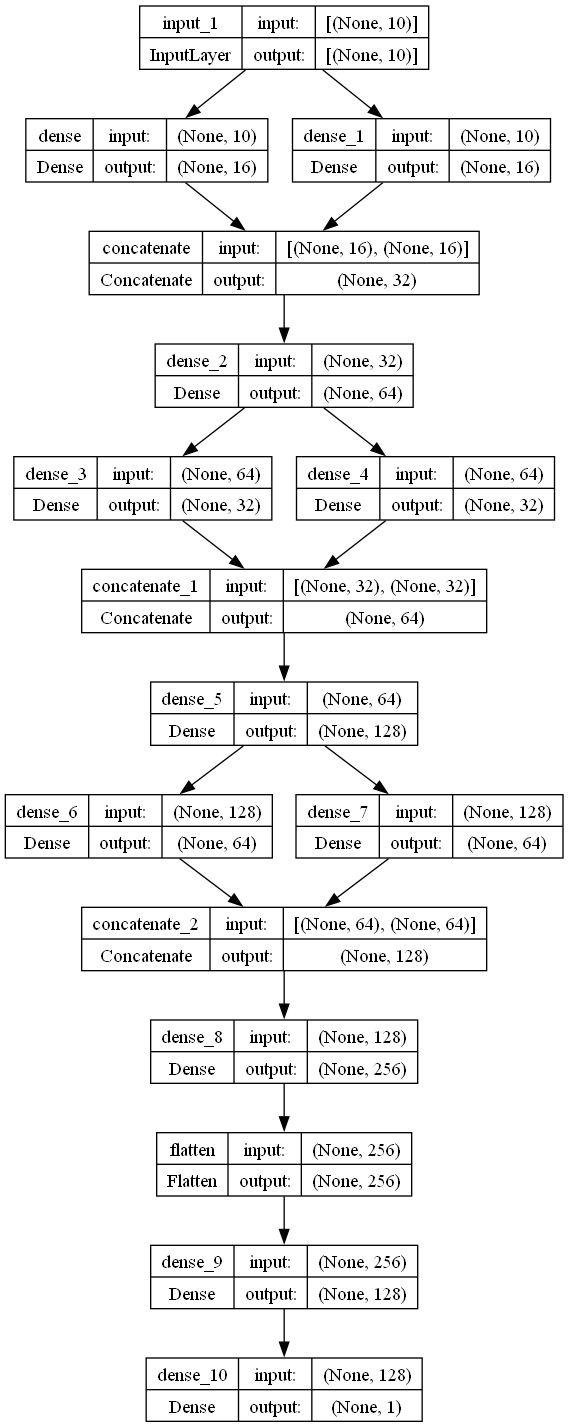

In [72]:
keras.utils.plot_model(func_model,show_shapes=True)

- Input layer memiliki filter sebanyak 10 
- dan diteruskan ke hidden layer dengan activation function relu yang memiliki 2 cabang dengan filter/Jaring Neural kelipatan 2 (16,32,64,128,256) dan kedua cabang sama
- Setiap akhir cabang, akan disatukan kembali dengan hidden layer 2\*\*(n+1), 
- setelahnya model di satukan kembali dan ratakan menjadi 1 Dimensi dan lalu di teruskan ke 1 layer yang memiliki filter 256, setelahnya dihasilkan hasil kesimpulan data dengan menggunakan aktivasi fungsi sigmoid. 

# Model Training

### Sequential Model

In [73]:
X_train.shape

(23216, 10)

In [74]:
keras.backend.clear_session()
seq_hist = seq_model.fit(X_train,y_train,epochs=20,callbacks=callback[1],validation_data=(X_val,y_val))

Epoch 1/20
  3/726 [..............................] - ETA: 37s - loss: 0.6818 - precision: 0.3333 

726/726 [==============================] - 33s 45ms/step - loss: 0.4576 - precision: 0.7241 - val_loss: 0.4214 - val_precision: 0.8225
Epoch 2/20
  3/726 [..............................] - ETA: 27s - loss: 0.3656 - precision: 0.8333

c:\Users\Administrator\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\src\engine\training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


726/726 [==============================] - 35s 48ms/step - loss: 0.4162 - precision: 0.7615 - val_loss: 0.4041 - val_precision: 0.7653
Epoch 3/20
726/726 [==============================] - 32s 44ms/step - loss: 0.4007 - precision: 0.7718 - val_loss: 0.3932 - val_precision: 0.8047
Epoch 4/20
726/726 [==============================] - 32s 45ms/step - loss: 0.3868 - precision: 0.7814 - val_loss: 0.3883 - val_precision: 0.7620
Epoch 5/20
726/726 [==============================] - 32s 44ms/step - loss: 0.3765 - precision: 0.7854 - val_loss: 0.3807 - val_precision: 0.7760
Epoch 6/20
726/726 [==============================] - 31s 43ms/step - loss: 0.3690 - precision: 0.7956 - val_loss: 0.3763 - val_precision: 0.8152
Epoch 7/20
726/726 [==============================] - 31s 43ms/step - loss: 0.3609 - precision: 0.7986 - val_loss: 0.3657 - val_precision: 0.7497
Epoch 8/20
726/726 [==============================] - 31s 42ms/step - loss: 0.3523 - precision: 0.7983 - val_loss: 0.3566 - val_precisi

### Functional Model

In [75]:
func_hist = func_model.fit(X_train,y_train,epochs=20,callbacks=callback[1],validation_data=(X_val,y_val))

Epoch 1/20
726/726 [==============================] - 40s 55ms/step - loss: 0.4507 - precision: 0.7211 - val_loss: 0.4134 - val_precision: 0.7320
Epoch 2/20
726/726 [==============================] - 40s 54ms/step - loss: 0.4027 - precision: 0.7628 - val_loss: 0.4180 - val_precision: 0.7122
Epoch 3/20
726/726 [==============================] - 40s 55ms/step - loss: 0.3829 - precision: 0.7740 - val_loss: 0.3738 - val_precision: 0.7765
Epoch 4/20
726/726 [==============================] - 41s 56ms/step - loss: 0.3665 - precision: 0.7879 - val_loss: 0.3686 - val_precision: 0.7589
Epoch 5/20
726/726 [==============================] - 44s 60ms/step - loss: 0.3559 - precision: 0.7943 - val_loss: 0.3615 - val_precision: 0.7926
Epoch 6/20
726/726 [==============================] - 42s 58ms/step - loss: 0.3459 - precision: 0.8032 - val_loss: 0.3564 - val_precision: 0.8102
Epoch 7/20
726/726 [==============================] - 41s 56ms/step - loss: 0.3364 - precision: 0.8123 - val_loss: 0.3381 - 

# Model Evaluation

## Loss dan Precision Plot

### Sequential

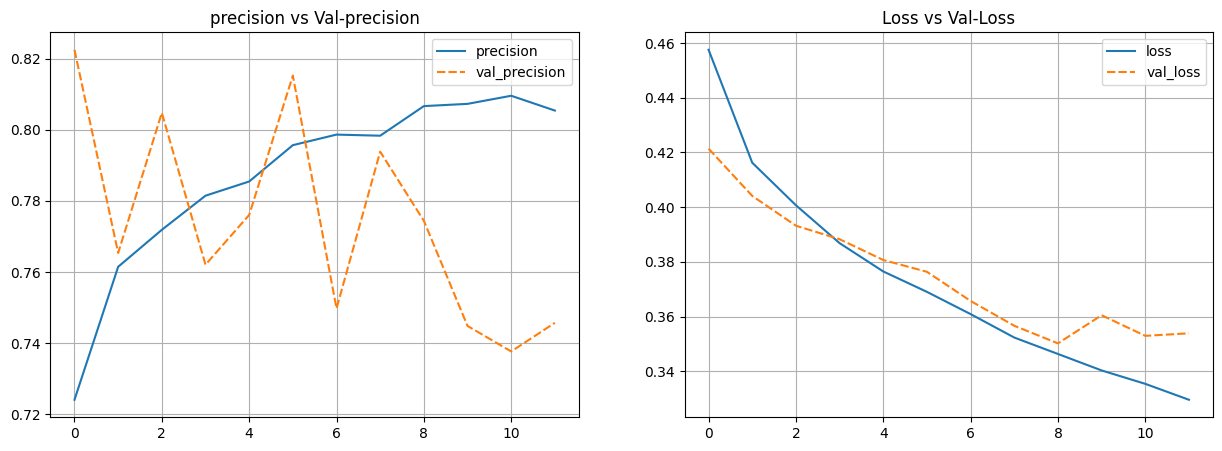

In [84]:
# Plot Training Results

history_model = pd.DataFrame(seq_hist.history)

plt.figure(figsize=(15, 5))
plt.subplot(1, 2, 1)
sns.lineplot(data=history_model[['precision', 'val_precision']])
plt.grid()
plt.title('precision vs Val-precision')

plt.subplot(1, 2, 2)
sns.lineplot(data=history_model[['loss', 'val_loss']])
plt.grid()
plt.title('Loss vs Val-Loss')

plt.show()

Sequential memiliki penurunan precision pada data validasi yang menandakan model ini overfit

### Functional

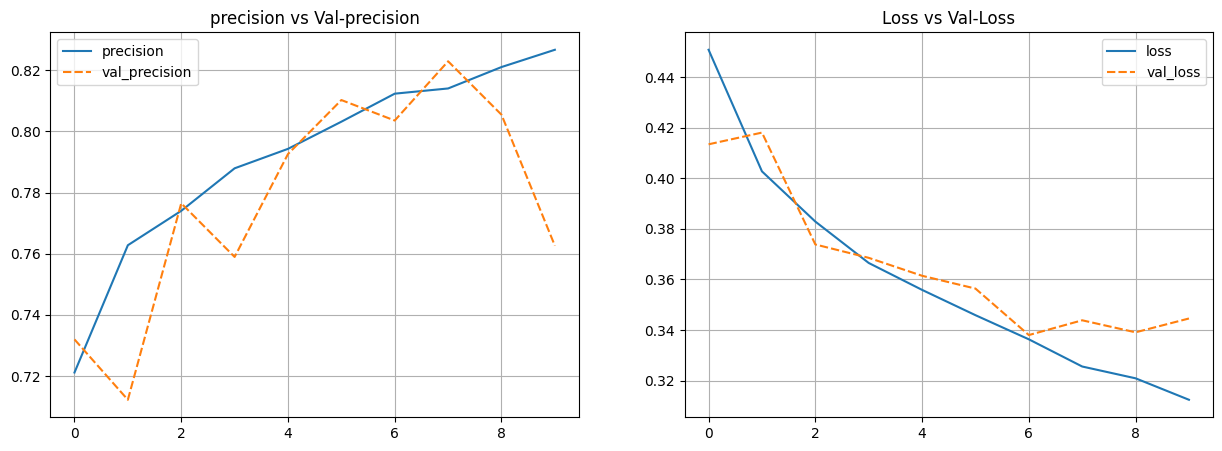

In [85]:
# Plot Training Results

history_model = pd.DataFrame(func_hist.history)

plt.figure(figsize=(15, 5))
plt.subplot(1, 2, 1)
sns.lineplot(data=history_model[['precision', 'val_precision']])
plt.grid()
plt.title('precision vs Val-precision')

plt.subplot(1, 2, 2)
sns.lineplot(data=history_model[['loss', 'val_loss']])
plt.grid()
plt.title('Loss vs Val-Loss')

plt.show()

Functional memiliki penurunan precision pada data validasi di paling ujung yang menandakan model ini mungkin overfit dalam beberapa data.

## Classification Report

### Sequential

In [86]:
y_pred = seq_model.predict(X_train)
y_pred = np.where(y_pred > 0.5,1,0)

print(classification_report(y_train,y_pred))

  1/726 [..............................] - ETA: 17s

726/726 [==============================] - 3s 4ms/step
              precision    recall  f1-score   support

           0       0.89      0.89      0.89     15610
           1       0.78      0.77      0.77      7606

    accuracy                           0.85     23216
   macro avg       0.83      0.83      0.83     23216
weighted avg       0.85      0.85      0.85     23216



In [87]:
y_pred = seq_model.predict(X_val)
y_pred = np.where(y_pred > 0.5,1,0)

print(classification_report(y_val,y_pred))

  1/182 [..............................] - ETA: 7s

182/182 [==============================] - 1s 4ms/step
              precision    recall  f1-score   support

           0       0.88      0.88      0.88      3902
           1       0.75      0.75      0.75      1902

    accuracy                           0.83      5804
   macro avg       0.81      0.81      0.81      5804
weighted avg       0.83      0.83      0.83      5804



### Functional

In [88]:
y_pred = func_model.predict(X_train)
y_pred = np.where(y_pred > 0.5,1,0)

print(classification_report(y_train,y_pred))

726/726 [==============================] - 5s 7ms/step
              precision    recall  f1-score   support

           0       0.89      0.90      0.90     15610
           1       0.79      0.78      0.79      7606

    accuracy                           0.86     23216
   macro avg       0.84      0.84      0.84     23216
weighted avg       0.86      0.86      0.86     23216



In [89]:
y_pred = func_model.predict(X_val)
y_pred = np.where(y_pred > 0.5,1,0)

print(classification_report(y_val,y_pred))

  1/182 [..............................] - ETA: 6s

182/182 [==============================] - 1s 7ms/step
              precision    recall  f1-score   support

           0       0.88      0.88      0.88      3902
           1       0.76      0.76      0.76      1902

    accuracy                           0.84      5804
   macro avg       0.82      0.82      0.82      5804
weighted avg       0.84      0.84      0.84      5804



Sequential model memiliki nilai precision yang lebih baik dibanding Functional model

### Kesimpulan Model Analysis

Functional model lebih bagus dikarenakan precisionnya memiliki trend positif walaupun sequential lebih bagus scorenya dibanding Functional

In [93]:
import json
with open('feature.json','w') as f:
    json.dump(feature,f)
import joblib
joblib.dump(trans,'transformer.pkl')

['transformer.pkl']